In [1]:
from diffusers import DiffusionPipeline

In [2]:
pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", use_safetensors=True)

safety_checker/pytorch_model.fp16.safetensors not found


Fetching 29 files:   0%|          | 0/29 [00:00<?, ?it/s]

Keyword arguments {'use_safetensors': True} are not expected by StableDiffusionPipeline and will be ignored.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [3]:
pipeline

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.11.1",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [4]:
pipeline.to("cuda")

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.11.1",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/50 [00:00<?, ?it/s]

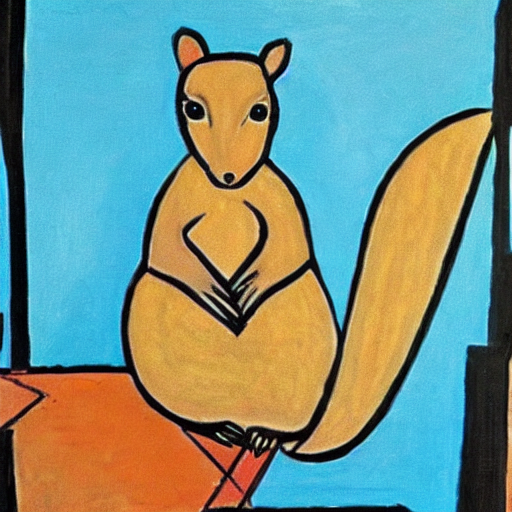

In [5]:
image = pipeline("An image of a squirrel in Picasso style").images[0]
image

In [6]:
image.save("image_of_squirrel_painting.png")

In [14]:
pipeline = DiffusionPipeline.from_pretrained("./stable-diffusion-v1-5", use_safetensors=True)

Keyword arguments {'use_safetensors': True} are not expected by StableDiffusionPipeline and will be ignored.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [15]:
image = pipeline("An image of a squirrel in Picasso style").images[0]
image.save("image_of_squirrel_painting_locally.png")

  0%|          | 0/50 [00:00<?, ?it/s]

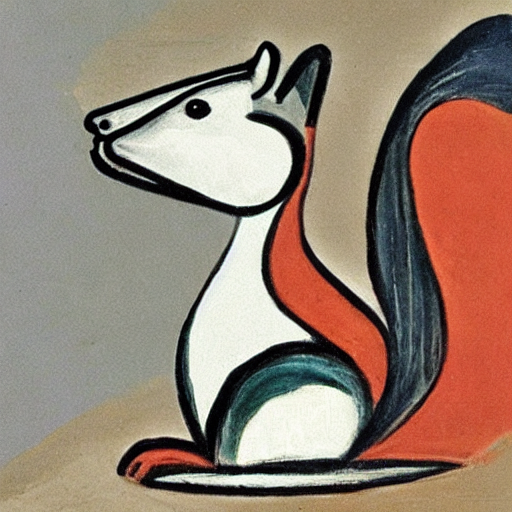

In [16]:
image

In [3]:
from diffusers import EulerDiscreteScheduler, DiffusionPipeline

In [4]:
pipeline = DiffusionPipeline.from_pretrained("./stable-diffusion-v1-5", use_safetensors=True)
pipeline.to('cuda')
pipeline.scheduler

Keyword arguments {'use_safetensors': True} are not expected by StableDiffusionPipeline and will be ignored.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


PNDMScheduler {
  "_class_name": "PNDMScheduler",
  "_diffusers_version": "0.11.1",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "steps_offset": 1,
  "trained_betas": null
}

In [5]:
pipeline.scheduler = EulerDiscreteScheduler.from_config(pipeline.scheduler.config)
pipeline.scheduler

EulerDiscreteScheduler {
  "_class_name": "EulerDiscreteScheduler",
  "_diffusers_version": "0.11.1",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "steps_offset": 1,
  "trained_betas": null
}

  0%|          | 0/50 [00:00<?, ?it/s]

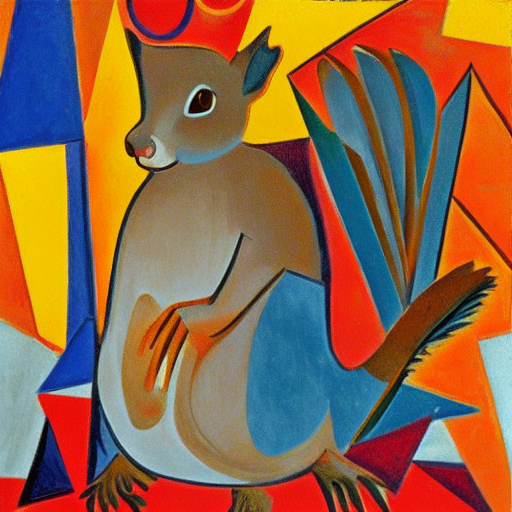

In [9]:
image = pipeline("An image of a squirrel in Picasso style").images[0]
image

In [7]:
image.save("pic/euler_image_of_squirrel_painting_locally.png")

In [15]:
from diffusers import UNet2DModel

In [16]:
repo_id = "google/ddpm-cat-256"
model = UNet2DModel.from_pretrained(repo_id, use_safetensors=True)

In [17]:
model.config

FrozenDict([('sample_size', 256),
            ('in_channels', 3),
            ('out_channels', 3),
            ('center_input_sample', False),
            ('time_embedding_type', 'positional'),
            ('freq_shift', 1),
            ('flip_sin_to_cos', False),
            ('down_block_types',
             ['DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'AttnDownBlock2D',
              'DownBlock2D']),
            ('up_block_types',
             ['UpBlock2D',
              'AttnUpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D']),
            ('block_out_channels', [128, 128, 256, 256, 512, 512]),
            ('layers_per_block', 2),
            ('mid_block_scale_factor', 1),
            ('downsample_padding', 0),
            ('act_fn', 'silu'),
            ('attention_head_dim', None),
            ('norm_num_groups', 32),
            ('norm_eps', 

In [18]:
import torch
torch.manual_seed(0)

noisy_sample = torch.randn(1, model.config.in_channels, model.config.sample_size, model.config.sample_size)
noisy_sample.shape

torch.Size([1, 3, 256, 256])

In [19]:
with torch.no_grad():
    noisy_residual = model(sample = noisy_sample, timestep=2).sample

In [20]:
from diffusers import DDPMScheduler
scheduler = DDPMScheduler.from_pretrained(repo_id)
scheduler

DDPMScheduler {
  "_class_name": "DDPMScheduler",
  "_diffusers_version": "0.11.1",
  "beta_end": 0.02,
  "beta_schedule": "linear",
  "beta_start": 0.0001,
  "clip_sample": true,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "trained_betas": null,
  "variance_type": "fixed_small"
}

In [21]:
less_noisy_sample = scheduler.step(model_output = noisy_residual, timestep=2, sample = noisy_sample).prev_sample
less_noisy_sample.shape

torch.Size([1, 3, 256, 256])

In [22]:
import PIL.Image
import numpy as np

def display_sample(sample, i):
    image_processed = sample.cpu().permute(0, 2, 3, 1)
    image_processed = (image_processed + 1.0) * 127.5
    image_processed = image_processed.numpy().astype(np.uint8)

    image_pil = PIL.Image.fromarray(image_processed[0])
    display(f"Image at step {i}")
    display(image_pil)

In [23]:
model.to('cuda')
noisy_sample = noisy_sample.to('cuda')

  5%|██▌                                                    | 47/1000 [00:02<00:36, 26.19it/s]

'Image at step 50'

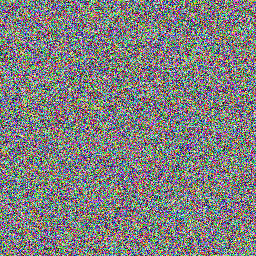

 10%|█████▍                                                 | 99/1000 [00:03<00:32, 27.38it/s]

'Image at step 100'

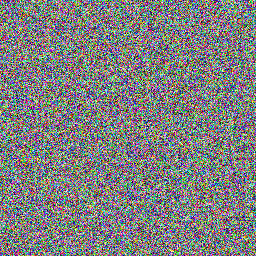

 15%|███████▉                                              | 147/1000 [00:05<00:32, 26.05it/s]

'Image at step 150'

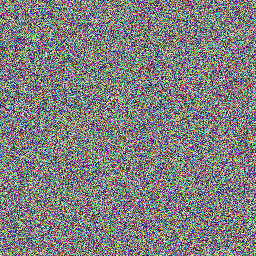

 20%|██████████▋                                           | 199/1000 [00:07<00:30, 26.43it/s]

'Image at step 200'

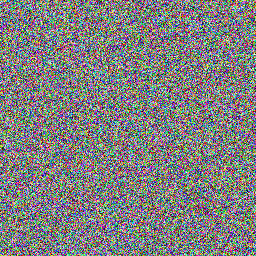

 25%|█████████████▎                                        | 247/1000 [00:09<00:27, 26.93it/s]

'Image at step 250'

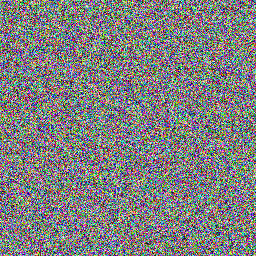

 30%|████████████████▏                                     | 299/1000 [00:11<00:26, 26.46it/s]

'Image at step 300'

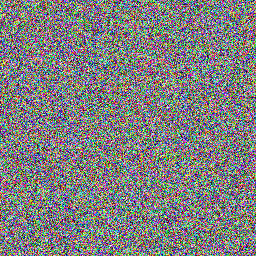

 35%|██████████████████▋                                   | 347/1000 [00:13<00:24, 26.82it/s]

'Image at step 350'

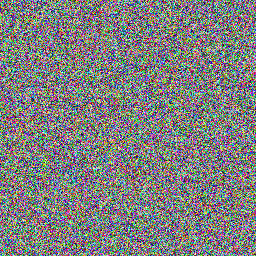

 40%|█████████████████████▍                                | 398/1000 [00:15<00:23, 26.15it/s]

'Image at step 400'

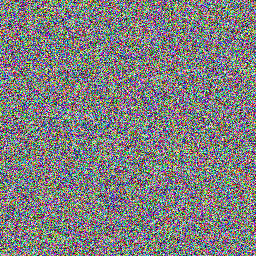

 45%|████████████████████████▏                             | 449/1000 [00:17<00:20, 27.28it/s]

'Image at step 450'

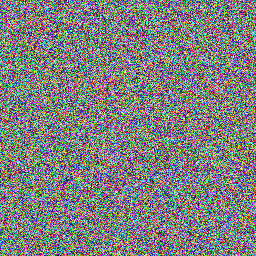

 50%|██████████████████████████▊                           | 497/1000 [00:19<00:18, 27.33it/s]

'Image at step 500'

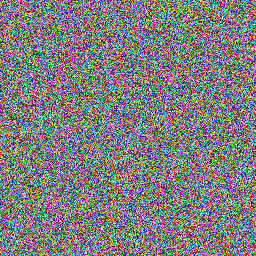

 55%|█████████████████████████████▋                        | 549/1000 [00:21<00:16, 26.60it/s]

'Image at step 550'

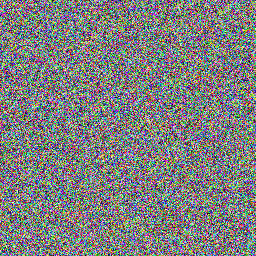

 60%|████████████████████████████████▏                     | 597/1000 [00:22<00:15, 26.81it/s]

'Image at step 600'

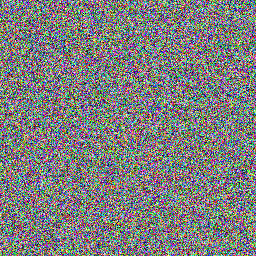

 65%|███████████████████████████████████                   | 649/1000 [00:24<00:12, 27.07it/s]

'Image at step 650'

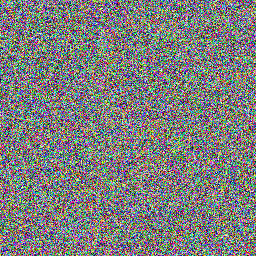

 70%|█████████████████████████████████████▋                | 697/1000 [00:26<00:11, 26.47it/s]

'Image at step 700'

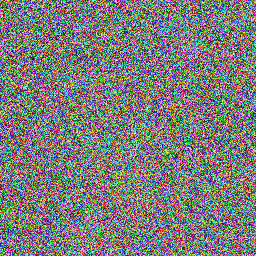

 75%|████████████████████████████████████████▍             | 749/1000 [00:28<00:09, 26.63it/s]

'Image at step 750'

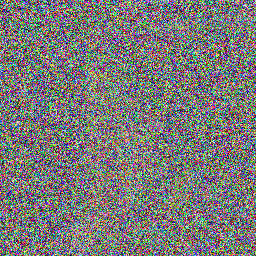

 80%|███████████████████████████████████████████           | 797/1000 [00:30<00:07, 26.77it/s]

'Image at step 800'

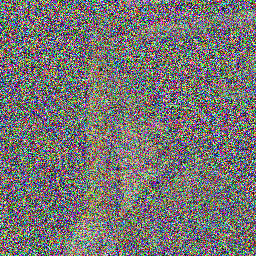

 85%|█████████████████████████████████████████████▊        | 849/1000 [00:32<00:05, 27.05it/s]

'Image at step 850'

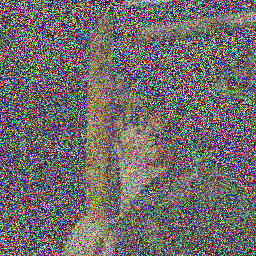

 90%|████████████████████████████████████████████████▍     | 897/1000 [00:34<00:03, 26.39it/s]

'Image at step 900'

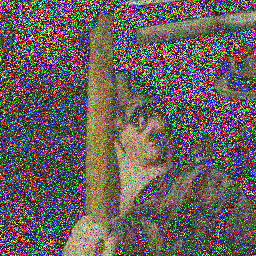

 95%|███████████████████████████████████████████████████▏  | 949/1000 [00:36<00:01, 27.34it/s]

'Image at step 950'

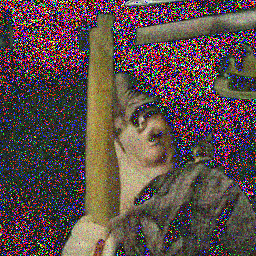

100%|█████████████████████████████████████████████████████▊| 997/1000 [00:37<00:00, 27.03it/s]

'Image at step 1000'

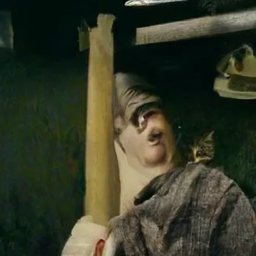

100%|█████████████████████████████████████████████████████| 1000/1000 [00:37<00:00, 26.33it/s]


In [24]:
import tqdm

sample = noisy_sample

for i, t in enumerate(tqdm.tqdm(scheduler.timesteps)):
    with torch.no_grad():
        residual = model(sample, t).sample
        
    sample = scheduler.step(residual, t, sample).prev_sample
    
    if (i +1) % 50 == 0:
        display_sample(sample, i+1)